In [4]:
!kaggle datasets download -d rounakbanik/the-movies-dataset


Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
License(s): CC0-1.0




  0%|          | 0.00/228M [00:00<?, ?B/s]
  0%|          | 1.00M/228M [00:00<03:08, 1.26MB/s]
  1%|          | 2.00M/228M [00:00<01:30, 2.61MB/s]
  2%|▏         | 4.00M/228M [00:01<00:44, 5.26MB/s]
  3%|▎         | 6.00M/228M [00:01<00:30, 7.53MB/s]
  4%|▎         | 8.00M/228M [00:01<00:24, 9.56MB/s]
  4%|▍         | 10.0M/228M [00:01<00:20, 11.3MB/s]
  5%|▌         | 12.0M/228M [00:01<00:17, 12.7MB/s]
  6%|▌         | 14.0M/228M [00:01<00:16, 13.6MB/s]
  7%|▋         | 16.0M/228M [00:01<00:15, 14.6MB/s]
  8%|▊         | 18.0M/228M [00:02<00:14, 14.8MB/s]
  9%|▉         | 20.0M/228M [00:02<00:14, 14.6MB/s]
 10%|▉         | 22.0M/228M [00:02<00:14, 15.3MB/s]
 11%|█         | 24.0M/228M [00:02<00:13, 15.8MB/s]
 11%|█▏        | 26.0M/228M [00:02<00:14, 14.3MB/s]
 12%|█▏        | 28.0M/228M [00:02<00:14, 14.8MB/s]
 13%|█▎        | 30.0M/228M [00:02<00:14, 14.8MB/s]
 14%|█▍        | 32.0M/228M [00:02<00:13, 15.1MB/s]
 15%|█▍        | 34.0M/228M [00:03<00:13, 15.4MB/s]
 16%|█▌        | 36.

In [6]:
import zipfile
import os

zip_file_path = 'the-movies-dataset.zip'

extract_to = 'data'

os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

os.remove(zip_file_path)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pa
from scipy.linalg import svd, diagsvd

In [8]:
import pandas as pd
df = pd.read_csv('data/ratings_small.csv')
df.head(2)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179


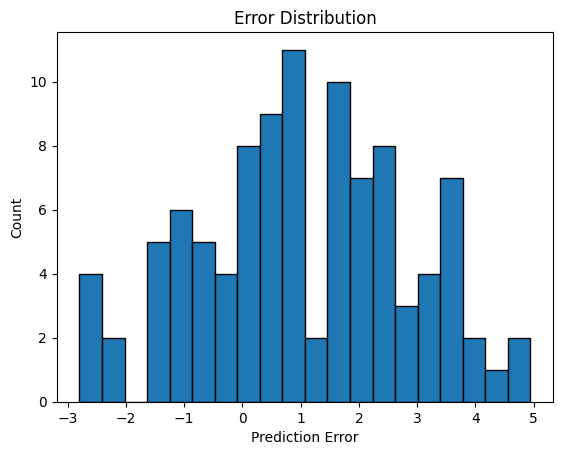

In [10]:
ratings = df[['userId', 'movieId', 'rating']]
rating_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)

def decompose_matrix_and_predict(matrix, i, j):
    """
    Decomposes the matrix using SVD and predicts the value at cell (i, j).
    """
    U, sigma, VT = svd(matrix, full_matrices=False)
    sigma[-170:] = 0  # Zero out the last 170 singular values
    Sigma = np.diag(sigma)
    
    B_approx = np.dot(U, np.dot(Sigma, VT))
    
    return B_approx[i, j]

numero_de_experimentos = 100
erros = []

# Get indices of non-zero entries
non_zero_indices = np.argwhere(rating_matrix.values != 0)
# Randomly sample indices for the experiments
sampled_indices = non_zero_indices[np.random.choice(non_zero_indices.shape[0], numero_de_experimentos, replace=True)]

for idx in sampled_indices:
    i, j = idx

    original_value = rating_matrix.iloc[i, j]

    matrix_corrupted = rating_matrix.copy()
    matrix_corrupted.iloc[i, j] = np.random.uniform(0, 5)
    
    predicted_value = decompose_matrix_and_predict(matrix_corrupted.values, i, j)
    
    error = original_value - predicted_value
    erros.append(error)

plt.hist(erros, bins=20, edgecolor='black')
plt.title('Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.show()
